<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
[Tip]: To execute the Python code in the code cell below, click on the cell to select it and press <kbd>Shift</kbd> + <kbd>Enter</kbd>.
</div>
<hr/>

# Notwendige Imports für dieses Notebook

In [1]:
import numpy as np
import pandas as pd

# visualization
import seaborn as sns

# Laden des Datensatzes

In [2]:
df = pd.read_csv('crime.csv', encoding='latin-1')

# Replace -1 values in Lat/Long with Nan
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)
df

/var/folders/wv/_1cv7qbx71vcpwv08d18rf_40000gn/T/ipykernel_55808/1875352944.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Lat.replace(-1, None, inplace=True)
/var/folders/wv/_1cv7qbx71vcpwv08d18rf_40000gn/T/ipykernel_55808/1875352944.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.0603,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


# Selektion

In [3]:
pd.DataFrame(df.where(df.UCR_PART == "Part One").INCIDENT_NUMBER.agg(["count"]))

,INCIDENT_NUMBER
count,61629


# Gruppierungen und Aggregation

In [4]:
df.groupby("YEAR").INCIDENT_NUMBER.agg(["count"])

,count
YEAR,
2015,53388
2016,99114
2017,100886
2018,65685


## Alternative

In [5]:
pd.DataFrame(df.groupby("YEAR").INCIDENT_NUMBER.count())

,INCIDENT_NUMBER
YEAR,
2015,53388
2016,99114
2017,100886
2018,65685


# Plotten mit Seaborn

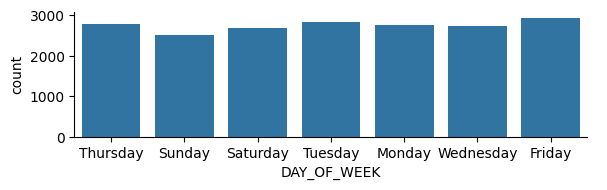

In [6]:
data = df.loc[(df.UCR_PART == 'Part One')  & (df.YEAR == 2016)]
_ = sns.catplot(x='DAY_OF_WEEK',
            kind='count',
            height=2,
            aspect=3.0,
            data=data)

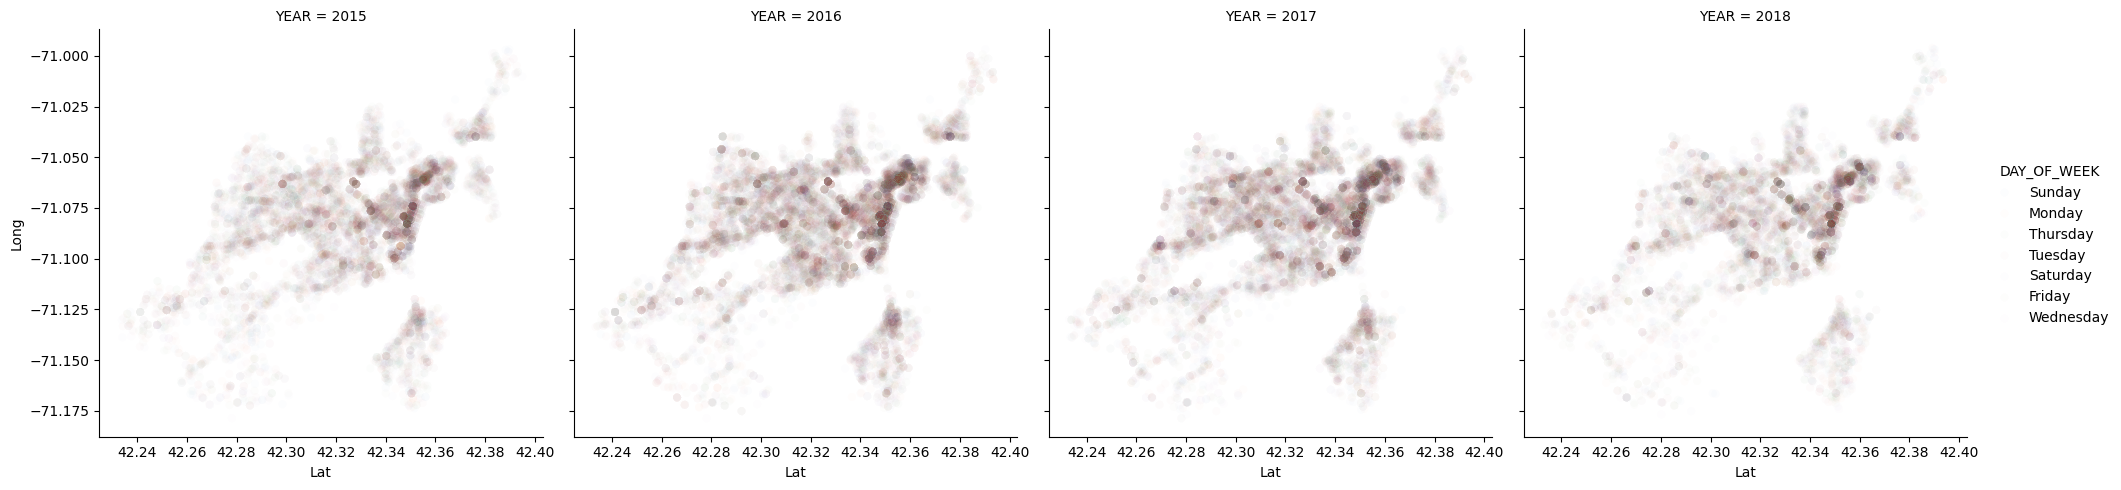

In [7]:
data = df.loc[(df.UCR_PART == 'Part One')]
_ = sns.relplot(x='Lat',
                y='Long',   
                col='YEAR',
                hue='DAY_OF_WEEK',
                alpha=0.01,
                data=data)